In [1]:
# Import library
import tensorflow as tf

c:\ProgramData\anaconda3\envs\tf_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
# import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# use assert function which is to check the shape of the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

In [6]:
# summarize loaded dataset
print("Train: x=%s, y=%s" % (x_train.shape, y_train.shape))
print("Test: x=%s, y=%s" % (x_test.shape, y_test.shape))

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


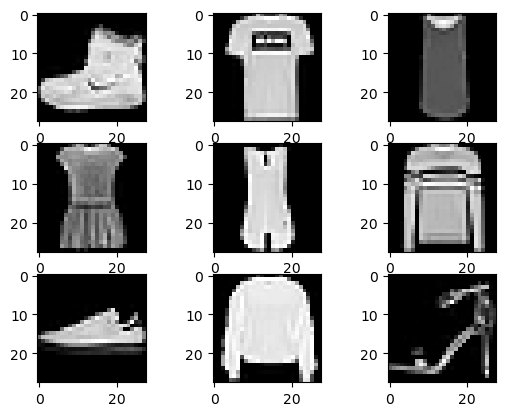

In [7]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):

    # define subplot
    plt.subplot(330 + 1 + i)

    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap("gray"))

# show the figure
plt.show()

In [ ]:
# preprocessing the data (normalization)

x_train = (
    x_train / 255.0
)  # its always 255 in greyscale because its the max value in greyscale (0-255)
x_test = x_test / 255.0

In [13]:
# define the model

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#  tf.keras.layers.Dense(128, activation='relu'),
# tf.keras.layers.Dense(10, activation='softmax')
# ])

# or another method which is much better of doing this is
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

model = Sequential(
    [
        Input(shape=(28, 28, 1)),  # 28×28 pixels, 1 channel (grayscale)
        Flatten(),
        Dense(128, activation="relu"),
        Dense(
            10, activation="softmax"
        ),  # softmax activation function for multi-class classification
    ]
)

In [16]:
# compile the model

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# train the model
model.fit(x_train, y_train, epochs=15)

# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9253 - loss: 0.2025
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9289 - loss: 0.1886
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9304 - loss: 0.1854
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9338 - loss: 0.1785
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9328 - loss: 0.1790
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9349 - loss: 0.1774
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9380 - loss: 0.1670
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9346 - loss: 0.1695
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9371 - loss: 0.1655
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9411 - loss: 0.1589
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9395 - loss: 0.1597
Epoch 12/15
1875/1875 ━━━━━━━━

In [20]:
# make predictions with the model
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


In [21]:
# print the shape of the predictions
print(predictions.shape)

(10000, 10)


In [24]:
# print the predictions into class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# print the first 10 predictions
print(class_labels[:10])

[<tf.Tensor: shape=(), dtype=int64, numpy=9>, <tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=6>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=6>, <tf.Tensor: shape=(), dtype=int64, numpy=5>, <tf.Tensor: shape=(), dtype=int64, numpy=7>]


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9681 - loss: 0.0846 - val_accuracy: 0.8854 - val_loss: 0.5657
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9700 - loss: 0.0814 - val_accuracy: 0.8890 - val_loss: 0.5788
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9693 - loss: 0.0804 - val_accuracy: 0.8837 - val_loss: 0.6217
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9715 - loss: 0.0761 - val_accuracy: 0.8858 - val_loss: 0.6022
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.0787 - val_accuracy: 0.8897 - val_loss: 0.5698
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0.0769 - val_accuracy: 0.8882 - val_loss: 0.6088
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9718 - loss: 0.0752 - val_accuracy: 0.8870 - val_loss: 0.6152
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9709 - loss: 0.0758 - 

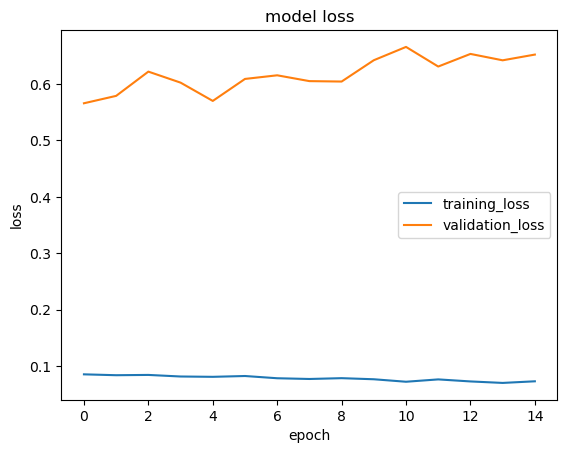

In [28]:
# plot the training and validation loss

import matplotlib.pyplot as plt
import numpy as np

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

plt.plot(history.history["loss"], label="training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()


# Understanding Training Loss vs. Validation Loss

# Your model's performance is tracked by two key metrics during training:

#    Training Loss: Measures how well the model fits the training data (should decrease over time).

#    Validation Loss: Measures how well the model generalizes to unseen data (should ideally decrease and stabilize).

This suggests that training loss kept decreasing and stabalized whereas validation loss first decreased and then increased after epoch=5.

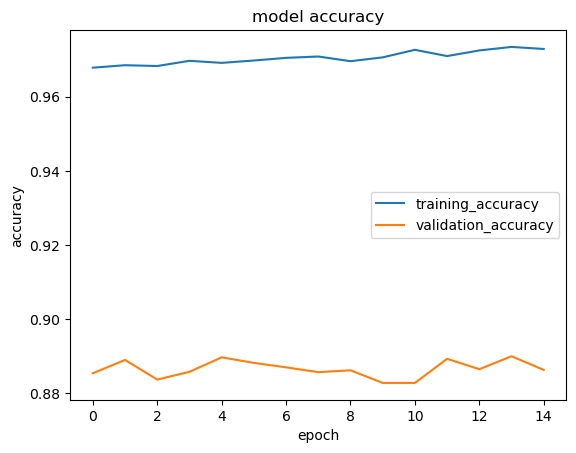

In [29]:
# plotting the training accuracy and validation accuracy

plt.plot(history.history["accuracy"], label="training_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

This is simply the inverse of loss the higher the loss the lower the accuracy and vice versa.
